# <p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">Fake News Detection</p>

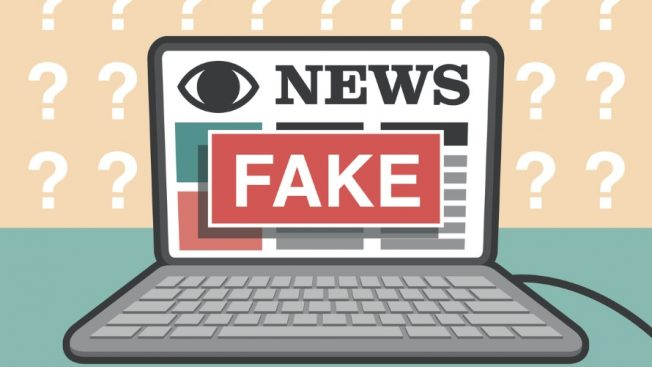

Fake news is false or misleading information presented as news. Fake news often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue.[1][2] Although false news has always been spread throughout history, the term "fake news" was first used in the 1890s when sensational reports in newspapers were common.[3][4] Nevertheless, the term does not have a fixed definition and has been applied broadly to any type of false information. It's also been used by high-profile people to apply to any news unfavourable to them. Further, disinformation involves spreading false information with harmful intent and is sometimes generated and propagated by hostile foreign actors, particularly during elections. In some definitions, fake news includes satirical articles misinterpreted as genuine, and articles that employ sensationalist or clickbait headlines that are not supported in the text.[1] Because of this diversity of types of false news, researchers are beginning to favour information disorder as a more neutral and informative term.

<p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">Dataset Used</p>


(WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

Dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).

There are 78098 data entries in csv file out of which only 72134 entries are accessed as per the data frame.

Published in:
IEEE Transactions on Computational Social Systems: pp. 1-13 (doi: 10.1109/TCSS.2021.3068519).

 <p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">Importing libraries...</p>

Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn .metrics import classification_report
import re
import string

<p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">Inserting the new Dataset</p>

In [2]:
df_news = pd.read_csv("WELFake_Dataset.csv")
#read the data set

In [3]:
df_news.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [4]:
df_news.shape

(72134, 4)

### <p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">Cleaning the Dataset</p>

"title", "Unnamed: 0" and "text" columns is not required for detecting the fake news, so I am going to drop the columns.

In [5]:
df = df_news.drop(["Unnamed: 0","title"], axis=1)
df.head(10)

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,All we can say on this one is it s about time ...,1
6,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,,1
8,"The owner of the Ringling Bar, located south o...",1
9,"FILE – In this Sept. 15, 2005 file photo, the ...",1


### Randomly shuffling the dataframe

In [6]:
# SHUFFLE THE DATA SET
df = df.sample(frac=1)

In [7]:
df.head(10)

,text,label
33337,We ve been screaming from the rooftop that Oba...,1
56634,They threw everything but the kitchen sink at ...,1
6139,(Want to get this briefing by email? Here’s th...,0
36192,"Posted by Tim Brown \nOn Monday, a man who vot...",1
19930,"On May 30, comedian Kathy Griffin tweeted a ph...",0
63191,"Turkey and Russia, whose relationship has h...",0
51367,BERLIN (Reuters) - Germany warned on Wednesday...,0
66744,A rookie police officer in Millis who said Wed...,1
59010,We’ve all heard of knockoff designer handbags ...,1
70454,"BERLIN — Anis Amri, a Tunisian man who turn...",0


In [8]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [9]:
df.columns

Index(['text', 'label'], dtype='object')

In [10]:
df.head()

,text,label
0,We ve been screaming from the rooftop that Oba...,1
1,They threw everything but the kitchen sink at ...,1
2,(Want to get this briefing by email? Here’s th...,0
3,"Posted by Tim Brown \nOn Monday, a man who vot...",1
4,"On May 30, comedian Kathy Griffin tweeted a ph...",0


CHECKING FOR THE NULL VALUE IN THE DATA

In [11]:
df.isnull().sum() 

text     39
label     0
dtype: int64

IT WILL DELETE THE ROW THAT CONTAINS THE NULL VALUE OR NO VALUE

In [12]:
df = df.dropna()  

AGAIN CHECK FOR THE ANY NULL VALUE IN THE DATAFRAME

In [13]:
df.isnull().sum() 

text     0
label    0
dtype: int64

PREVIOUS DATAFRAME SHAPE WAS: (72134, 4); NOW DATAFRAME SHAPE AFTER REMOVING NULL STRIGN WILL BE: (72095, 2)

In [14]:
df.shape  

(72095, 2)

In [15]:
df.head()

,text,label
0,We ve been screaming from the rooftop that Oba...,1
1,They threw everything but the kitchen sink at ...,1
2,(Want to get this briefing by email? Here’s th...,0
3,"Posted by Tim Brown \nOn Monday, a man who vot...",1
4,"On May 30, comedian Kathy Griffin tweeted a ph...",0


### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [16]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [17]:
df["text"] = df["text"].apply(wordopt)

In [18]:
df.head(10)

,text,label
0,we ve been screaming from the rooftop that oba...,1
1,they threw everything but the kitchen sink at ...,1
2,want to get this briefing by email here s th...,0
3,posted by tim brown on monday a man who vote...,1
4,on may comedian kathy griffin tweeted a phot...,0
5,turkey and russia whose relationship has h...,0
6,berlin reuters germany warned on wednesday...,0
7,a rookie police officer in millis who said wed...,1
8,we ve all heard of knockoff designer handbags ...,1
9,berlin anis amri a tunisian man who turn...,0


### <p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">Defining dependent and independent variable as x and y</p>

### x -> dependent variable (text) "target"
### Y-> independent variable (label) "predictor"

In [19]:
x = df["text"]
y = df["label"]

### <p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">Splitting the dataset into training set and testing set</p>

### passing the variables adn splitting the datasets into a ratio.
### ex:- 0.25 means 70% training dataset model, 25% testing dataset model

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### <p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">Convert text to vectors</p>

### tfidvectorizor -> convert a collection of raw document, to a matrix od TF-IDF
### where TF-> term frequency (hpw often the phrase appears in the document)
#### IDF-> Inverse document frequency (priority of the code)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### fit_transform -> form the IDF and return the output as document term matrix.
### transform -> transform document to document term matrix.

### <p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">1. Logistic Regression</p>

### <p>It is a regression analysis predictive model technique, which produces the result in a binary format which is used to predict the outcome of a categorical dependent variable.<br> Equation = log[Y/1+Y]</p>

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [25]:
df_fake_manual_testing = df.tail(10)
for i in range(72094,72084,-1):
    df.drop([i], axis = 0, inplace = True)

In [26]:
df.shape

(72085, 2)

### Equation are maded through .fit(), fro performing the logistic regression.

In [27]:
LR = LogisticRegression(solver='lbfgs', max_iter=72085)
LR.fit(xv_train,y_train)

LogisticRegression(max_iter=72085)

### predict the values for the random input

In [28]:
pred_lr=LR.predict(xv_test)

In [29]:
LR.score(xv_test, y_test)

0.9457944962272525

In [30]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8849
           1       0.94      0.96      0.95      9175

    accuracy                           0.95     18024
   macro avg       0.95      0.95      0.95     18024
weighted avg       0.95      0.95      0.95     18024



### <p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">2. Decision Tree Classification</p>

### A graphical representation of all the possible solutions to a decesion based on certain condition.It start with root node and ends to a leaf node.

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [33]:
pred_dt = DT.predict(xv_test)

In [34]:
DT.score(xv_test, y_test)

0.9206058588548602

In [35]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      8849
           1       0.91      0.94      0.92      9175

    accuracy                           0.92     18024
   macro avg       0.92      0.92      0.92     18024
weighted avg       0.92      0.92      0.92     18024



### <p style="background-color:#faf0ca;font-family:Roboto;color:#0d3b66;font-size:150%; font-weight:600;text-align:center;border-radius:20px; padding-top:10px; padding-bottom:10px;">Model Testing With Manual Entry</p>


In [36]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0])))

In [37]:
news = str(input())
manual_testing(news)

 No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to



LR Prediction: Not A Fake News 
DT Prediction: Fake News
